In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model


### Importing data

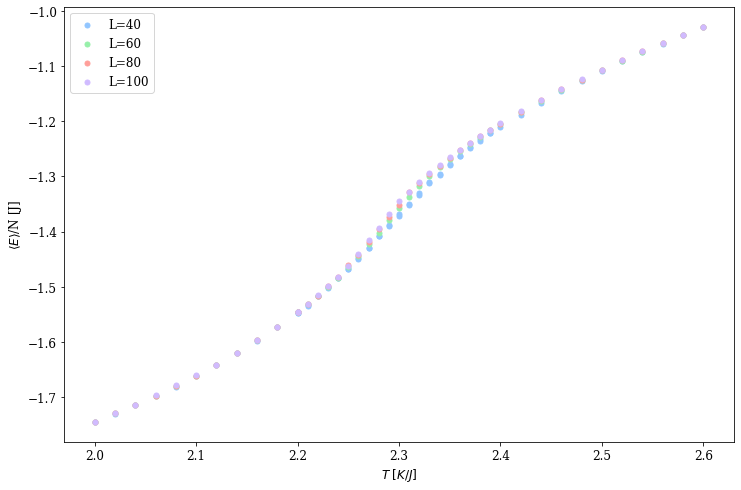

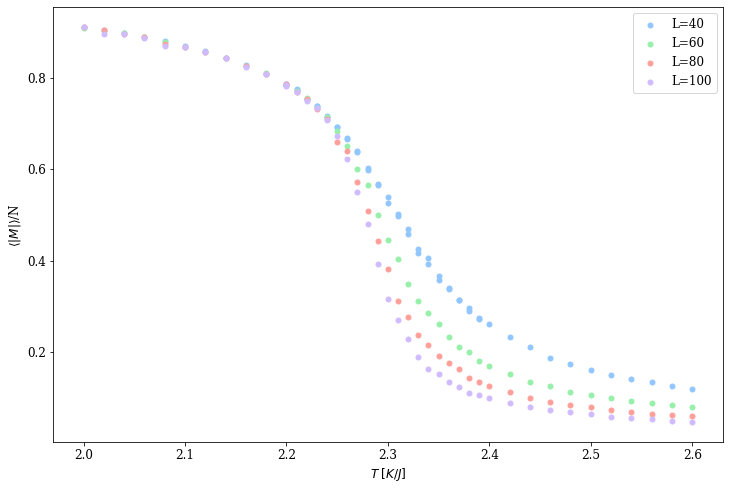

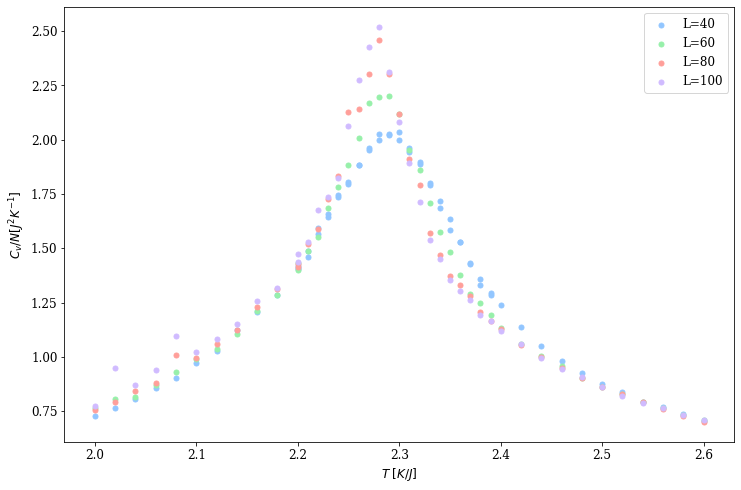

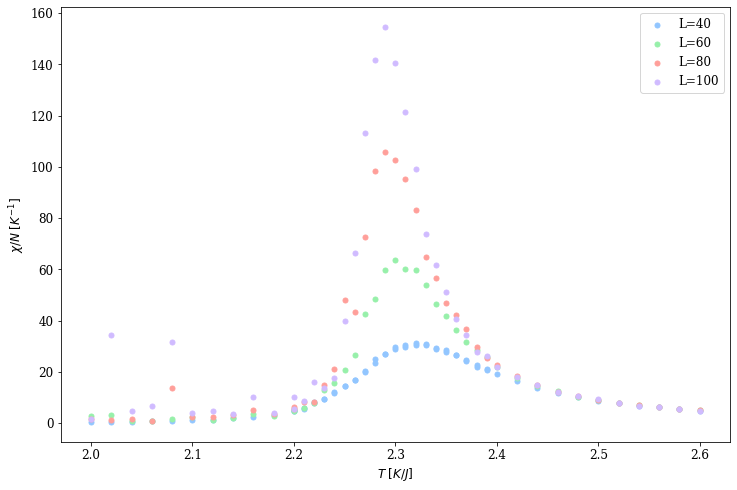

In [30]:
df_40_below_tc_range = pd.read_csv('../data/40/last_qt_L40_A0_mc1000000_burn1_lt2.000_ut2.200.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_40_tc_range = pd.read_csv('../data/40/last_qt_L40_A0_mc1000000_burn1_lt2.200_ut2.400.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_40_above_tc_range = pd.read_csv('../data/40/last_qt_L40_A0_mc1000000_burn1_lt2.400_ut2.600.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_40 = pd.concat([df_40_below_tc_range, df_40_tc_range, df_40_above_tc_range])

df_40 = df_40.sort_values(by=['T'])

df_60_below_tc_range = pd.read_csv('../data/60/last_qt_L60_A0_mc1000000_burn1_lt2.000_ut2.200.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_60_tc_range = pd.read_csv('../data/60/last_qt_L60_A0_mc1000000_burn1_lt2.200_ut2.400.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_60_above_tc_range = pd.read_csv('../data/60/last_qt_L60_A0_mc1000000_burn1_lt2.400_ut2.600.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_60 = pd.concat([df_60_below_tc_range, df_60_tc_range, df_60_above_tc_range])
df_60 = df_60.sort_values(by=['T'])


df_80_below_tc_range = pd.read_csv('../data/80/last_qt_L80_A0_mc1000000_burn1_lt2.000_ut2.200.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_80_tc_range = pd.read_csv('../data/80/last_qt_L80_A0_mc1000000_burn1_lt2.200_ut2.400.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_80_above_tc_range = pd.read_csv('../data/80/last_qt_L80_A0_mc1000000_burn1_lt2.400_ut2.600.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_80 = pd.concat([df_80_below_tc_range, df_80_tc_range, df_80_above_tc_range])
df_80 = df_80.sort_values(by=['T'])

df_100_below_tc_range = pd.read_csv('../data/100/last_qt_L100_A0_mc1000000_burn1_lt2.000_ut2.200.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_100_tc_range = pd.read_csv('../data/100/last_qt_L100_A0_mc1000000_burn1_lt2.200_ut2.400.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_100_above_tc_range = pd.read_csv('../data/100/last_qt_L100_A0_mc1000000_burn1_lt2.400_ut2.600.csv', names=["avg_e","avg_mabs","Cv","chi", "T"])
df_100 = pd.concat([df_100_below_tc_range, df_100_tc_range, df_100_above_tc_range])

plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

# plot the data
plt.scatter(df_40['T'], df_40['avg_e'], label='L=40', marker='.')
plt.scatter(df_60['T'], df_60['avg_e'], label='L=60', marker='.')
plt.scatter(df_80['T'], df_80['avg_e'], label='L=80', marker='.')
plt.scatter(df_100['T'], df_100['avg_e'], label='L=100', marker='.')
# set the x and y axis labels
plt.xlabel('$T \; [K/J]$')
plt.ylabel('$\langle E\\rangle$/N [J]')

# set the title
#plt.title('avg_e vs T')
# set the legend
plt.legend()
# save the figure
plt.savefig('../figs/avg_e_vs_T.pdf')
# show the figure
plt.show()


# plot the data
plt.scatter(df_40['T'], df_40['avg_mabs'], label='L=40', marker='.')
plt.scatter(df_60['T'], df_60['avg_mabs'], label='L=60', marker='.')
plt.scatter(df_80['T'], df_80['avg_mabs'], label='L=80', marker='.')
plt.scatter(df_100['T'], df_100['avg_mabs'], label='L=100', marker='.')
# set the x and y axis labels
plt.xlabel('$T \; [K/J]$')
plt.ylabel('$\langle |M|\\rangle$/N')
#plt.title('avg_mabs vs T')
plt.legend()
plt.savefig('../figs/avg_mabs_vs_T.pdf')
plt.show()


# plot the data
plt.scatter(df_40['T'], df_40['Cv'], label='L=40', marker='.')
plt.scatter(df_60['T'], df_60['Cv'], label='L=60', marker='.')
plt.scatter(df_80['T'], df_80['Cv'], label='L=80', marker='.')
plt.scatter(df_100['T'], df_100['Cv'], label='L=100', marker='.')

plt.xlabel('$T \; [K/J]$')
plt.ylabel('$C_v/N [J^2 K^{-1}]$')
#plt.title('Cv vs T')
plt.legend()
# save the figure
plt.savefig('../figs/Cv_vs_T.pdf')
# show the figure
plt.show()


# plot the data
plt.scatter(df_40['T'], df_40['chi'], label='L=40', marker='.')
plt.scatter(df_60['T'], df_60['chi'], label='L=60', marker='.')
plt.scatter(df_80['T'], df_80['chi'], label='L=80', marker='.')
plt.scatter(df_100['T'], df_100['chi'], label='L=100', marker='.')

plt.xlabel('$T \; [K/J]$')
plt.ylabel('$\chi/N \; [K^{-1}]$')
#plt.title('chi vs T')
plt.legend()
plt.savefig('../figs/chi_vs_T.pdf')
plt.show()


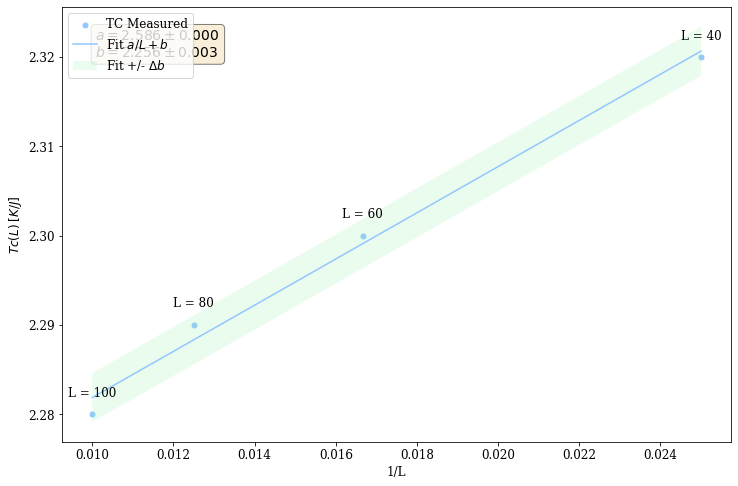

In [48]:
# the critical temperature is the temperature at which the heat capacity is a maximum
# find the critical temperature for each lattice size
tc_40 = df_40.loc[df_40['chi'] == df_40['chi'].max(), 'T'].iloc[0]
tc_60 = df_60.loc[df_60['chi'] == df_60['chi'].max(), 'T'].iloc[0]
tc_80 = df_80.loc[df_80['chi'] == df_80['chi'].max(), 'T'].iloc[0]
tc_100 = df_100.loc[df_100['Cv'] == df_100['Cv'].max(), 'T'].iloc[0]

# plot the critical temperatures and the linear relation a/L + b where L is the lattice size

L_array = np.array([40, 60, 80, 100])

# make linear fit with sklearn
regr = linear_model.LinearRegression()
regr.fit((1/L_array).reshape(-1, 1), np.array([tc_40, tc_60, tc_80, tc_100]))
a = regr.coef_[0]
b = regr.intercept_

# find delta b by the error propagation formula
delta_b = np.sqrt(np.sum((np.array([tc_40, tc_60, tc_80, tc_100]) - (a/L_array + b))**2))

# plot the data
plt.scatter(1/L_array, np.array([tc_40, tc_60, tc_80, tc_100]), label='TC Measured', marker='.')
plt.plot(1/L_array, a/L_array + b, label='Fit $a/L + b$')

# plot the error as a shaded region
plt.fill_between(1/L_array, a/L_array + b - delta_b, a/L_array + b + delta_b, alpha=0.2, label='Fit +/- $\Delta b$')


# add L legend above each point 
for i, txt in enumerate(L_array):
    plt.annotate('L = {}'.format(txt), (1/L_array[i], np.array([tc_40, tc_60, tc_80,tc_100])[i] + 0.002), ha='center')
    

# set the x and y axis labels
plt.xlabel('1/L')
plt.ylabel('$Tc(L) \:[K/J]$')
# set the title
# plt.title('Tc vs L')
# set the legend
plt.legend()
# save the figure
plt.savefig('Tc_vs_L.pdf')
# show the figure   
plt.show()
